# matplotlib 入門 (3) nitta@tsuda.ac.jp

# 3章: 日本語フォントの利用

<ol>
<li> IPAが配布している日本語フォント IPAex をダウンロードして展開する。</li>
<li>ipaexg.ttf をmatplotlibのフォント用フォルダに置く。</li>
<li>フォンt用キャッシュファイルを削除する。</li>
<li>ランタイムを再起動する。</li>
<li><del>matplotlibの設定ファイル matplotlibrc でipaexg.ttf を読み込む設定をする。</del> pythonプログラムの中で <code>plt.rcParams['font.family'] = 'IPAexGothic'</code> を指定する。</li>

</ol>

## 3-1: 日本語フォントをダウンロードして展開する

IPAex フォントはいくつかのバージョンがある。
現時点 (2022/03/25) での最新版は Ver.004.01
<a href="https://moji.or.jp/ipafont/ipaex00401/">
https://moji.or.jp/ipafont/ipaex00401/
</a>
である。
今回は IPAexゴシック ipaexg00401.zip を
ダウンロードする。

公式のURL:
<a href="https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip">
https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip
</a>

mirror: 
<a href="http://nw.tsuda.ac.jp/python/matplotlib/ipaexg00401.zip">
http://nw.tsuda.ac.jp/python/matplotlib/ipaexg00401.zip
</a>



In [1]:
FNAME = 'ipaexg00401.zip'
URL = f'https://moji.or.jp/wp-content/ipafont/IPAexfont/{FNAME}'
# URL = f'http://nw.tsuda.ac.jp/python/matplotlib/{FNAME}'

import os
if os.name != 'nt':
    ! wget {URL}
    ! unzip {FNAME}
else:
    import urllib.request
    import zipfile
    urllib.request.urlretrieve(URL, FNAME)
    with zipfile.ZipFile(FNAME, 'r') as f:
        f.extractall('.')

--2022-07-10 03:49:19--  https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip
Resolving moji.or.jp (moji.or.jp)... 157.7.44.215
Connecting to moji.or.jp (moji.or.jp)|157.7.44.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4166255 (4.0M) [application/zip]
Saving to: ‘ipaexg00401.zip’

ipaexg00401.zip     100%[===================>]   3.97M  2.98MB/s    in 1.3s    

2022-07-10 03:49:21 (2.98 MB/s) - ‘ipaexg00401.zip’ saved [4166255/4166255]

Archive:  ipaexg00401.zip
   creating: ipaexg00401/
  inflating: ipaexg00401/ipaexg.ttf  
  inflating: ipaexg00401/IPA_Font_License_Agreement_v1.0.txt  
  inflating: ipaexg00401/Readme_ipaexg00401.txt  


## 3-2: フォントを格納するフォルダを調べる

フォントを格納するフォルダはシステムによって異なる。
下のコードの実行例はGoogle Colab で実行した場合である。

Windows 上の Anaconda を D:\sys\Anaconda3 にインストールして、python仮想環境 book3 上で jupyter notebook を動かした場合の例は次の通り。<br />

'D:\\sys\\Anaconda3\\envs\\book3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'


In [2]:
# resolve OS dependencies by nitta
if os.name == 'nt':
    LS = 'dir /w'
    LS_L = 'dir'
    LS_LR = 'dir /s'
    RM_RF = 'rmdir /S /Q'
    CP = 'copy'
else:
    LS = 'ls'
    LS_L = 'ls -al'
    LS_LR = 'ls -lR'
    RM_RF = 'rm -rf'
    CP = 'cp'

In [3]:
# sample code 3-1
import matplotlib

tmp = matplotlib.matplotlib_fname() 
print(tmp)

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [4]:
dpath, fname = os.path.split(tmp)

fontpath = os.path.join(dpath, 'fonts', 'ttf')
! {LS} {fontpath}

cmb10.ttf			DejaVuSerif.ttf
cmex10.ttf			LICENSE_DEJAVU
cmmi10.ttf			LICENSE_STIX
cmr10.ttf			STIXGeneralBolIta.ttf
cmss10.ttf			STIXGeneralBol.ttf
cmsy10.ttf			STIXGeneralItalic.ttf
cmtt10.ttf			STIXGeneral.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBolIta.ttf
DejaVuSans-Bold.ttf		STIXNonUniBol.ttf
DejaVuSansDisplay.ttf		STIXNonUniIta.ttf
DejaVuSansMono-BoldOblique.ttf	STIXNonUni.ttf
DejaVuSansMono-Bold.ttf		STIXSizFiveSymReg.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymBol.ttf
DejaVuSansMono.ttf		STIXSizFourSymReg.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymBol.ttf
DejaVuSans.ttf			STIXSizOneSymReg.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymBol.ttf
DejaVuSerif-Bold.ttf		STIXSizThreeSymReg.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymBol.ttf
DejaVuSerif-Italic.ttf		STIXSizTwoSymReg.ttf


In [5]:
SRC = os.path.join('ipaexg00401', 'ipaexg.ttf')
! {CP} {SRC} {fontpath}

## 3-3: フォントキャッシュを削除する。

Google Colab ではフォントキャッシュの場所は <code>matplotlib.get_cachedir()</code> で調べる。
消すべきなのはそのフォルダの中の fontlist-v<i>XXX</i>.json ファイルなのだが、面倒なので今回はフォルダごと消してしまう。

In [6]:
# font cache path
import matplotlib
cache_path = matplotlib.get_cachedir()
print(cache_path)

! {LS_L} {cache_path}
! {RM_RF} {cache_path}

/root/.cache/matplotlib
total 44
drwxr-xr-x 3 root root  4096 Jul  6 13:32 .
drwxr-xr-x 1 root root  4096 Jul  7 13:19 ..
-rw-r--r-- 1 root root 29337 Jul  6 13:32 fontlist-v310.json
drwxr-xr-x 2 root root  4096 Jul  6 13:32 tex.cache


Windows や Mac の Anaconda で jupyter を動作させている場合は、フォントキャッシュは<code>matplotlib.get_configdir()</code> の下の
fontlist-v<i>XXX</i>.json である。

## 3-4: runtime を再起動する

Google Colab の場合:
ランタイム &rarr; ランタイムを再起動

手元のPCで jupyter notebook を走らせている場合:
Kernel &rarr; Restart

## 3-5: font.family を指定して matplotlib を利用する。

runtime を再起動した後、直ちに次のセルを実行する。

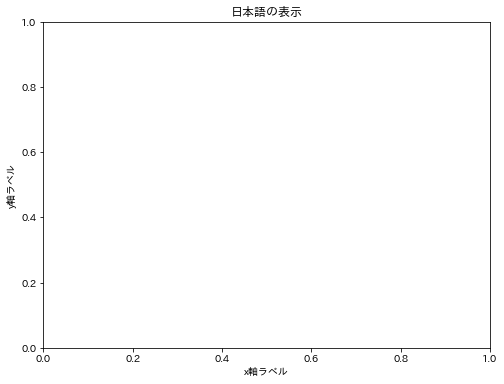

In [1]:
# sample code 3-5
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'IPAexGothic'

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_title('日本語の表示')
ax.set_xlabel('x軸ラベル')
ax.set_ylabel('y軸ラベル')

plt.show()